### Step 1: Import Python Libraries

The first step involved in ML using python is understanding and playing around with our data using libraries.

Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.

#### Pandas and Numpy have been used for Data Manipulation and numerical Calculations

#### Matplotlib and Seaborn have been used for Data visualizations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


### Step 2: Reading Dataset


The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the `read_csv()` function, data can be converted to a pandas DataFrame.

In [40]:
df = pd.read_csv("../Final_dataset/building_consumption.csv")

df

,campus_id,meter_id,timestamp,consumption
0,1,1,2019-03-29 01:15:00,0.01100
1,1,1,2019-03-29 01:30:00,0.02100
2,1,1,2019-03-29 01:45:00,0.03800
3,1,1,2019-03-29 02:00:00,0.87100
4,1,1,2019-03-29 02:15:00,0.87300
...,...,...,...,...
8095519,1,64,2022-04-30 22:45:00,0.84375
8095520,1,64,2022-04-30 23:00:00,1.15625
8095521,1,64,2022-04-30 23:15:00,1.32813
8095522,1,64,2022-04-30 23:30:00,1.21875


In [42]:
data = df.iloc[:100000]
data

,campus_id,meter_id,timestamp,consumption
0,1,1,2019-03-29 01:15:00,0.011
1,1,1,2019-03-29 01:30:00,0.021
2,1,1,2019-03-29 01:45:00,0.038
3,1,1,2019-03-29 02:00:00,0.871
4,1,1,2019-03-29 02:15:00,0.873
...,...,...,...,...
99995,1,3,2020-01-05 22:30:00,1.612
99996,1,3,2020-01-05 22:45:00,1.614
99997,1,3,2020-01-05 23:00:00,1.607
99998,1,3,2020-01-05 23:15:00,1.612


### Analyzing the Data
Before we make any inferences, we listen to our data by examining all variables in the data.

The main goal of data understanding is to gain general insights about the data, which covers the number of rows and columns, values in the data, datatypes, and Missing values in the dataset.

`shape – shape` will display the number of observations(rows) and features(columns) in the dataset

There are 8095524 observations and 4 variables in our dataset

`head()` will display the top 5 observations of the dataset



In [5]:
data.head()


,campus_id,meter_id,timestamp,consumption
0,1,1,2019-03-29 01:15:00,0.011
1,1,1,2019-03-29 01:30:00,0.021
2,1,1,2019-03-29 01:45:00,0.038
3,1,1,2019-03-29 02:00:00,0.871
4,1,1,2019-03-29 02:15:00,0.873


`tail()` will display the last 5 observations of the dataset



In [6]:
data.tail()


,campus_id,meter_id,timestamp,consumption
8095519,1,64,2022-04-30 22:45:00,0.84375
8095520,1,64,2022-04-30 23:00:00,1.15625
8095521,1,64,2022-04-30 23:15:00,1.32813
8095522,1,64,2022-04-30 23:30:00,1.21875
8095523,1,64,2022-04-30 23:45:00,0.87500


`info()` helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8095524 entries, 0 to 8095523
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   campus_id    int64  
 1   meter_id     int64  
 2   timestamp    object 
 3   consumption  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 247.1+ MB


### Check for Duplication
`nunique()` based on several unique values in each column and the data description, we can identify the continuous and categorical columns in the data. Duplicated data can be handled or removed based on further analysis

In [8]:
data.nunique()


campus_id           3
meter_id           64
timestamp      152206
consumption    664607
dtype: int64

### Missing Values Calculation
`isnull()` is widely been in all pre-processing steps to identify null values in the data

In our example, `data.isnull().sum()` is used to get the number of missing records in each column

In [9]:
data.isnull().sum()


campus_id      0
meter_id       0
timestamp      0
consumption    0
dtype: int64

The below code helps to calculate the percentage of missing values in each column

In [10]:
(data.isnull().sum()/(len(data)))*100


campus_id      0.0
meter_id       0.0
timestamp      0.0
consumption    0.0
dtype: float64

### Data Reduction
Some columns or variables can be dropped if they do not add value to our analysis.

In our dataset, the column campus_id have only ID values, assuming they don’t have any predictive power to predict the dependent variable

In [11]:
# Remove campus_id column from data
data = data.drop(['campus_id'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8095524 entries, 0 to 8095523
Data columns (total 3 columns):
 #   Column       Dtype  
---  ------       -----  
 0   meter_id     int64  
 1   timestamp    object 
 2   consumption  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 185.3+ MB


### Statistics Summary
The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float

In [12]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
meter_id,8095524.0,33.737509,17.652617,1.000,19.00000,33.0,49.000,64.000
consumption,8095524.0,13.080481,15.050121,-22.798,3.01465,8.5,17.375,116.875


describe(include=’all’) provides a statistics summary of all data, include object, category etc

In [13]:
data.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
meter_id,8095524.0,NaN,NaN,NaN,33.737509,17.652617,1.0,19.0,33.0,49.0,64.0
timestamp,8095524,152206,2020-02-20 02:00:00,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
consumption,8095524.0,NaN,NaN,NaN,13.080481,15.050121,-22.798,3.01465,8.5,17.375,116.875


### EDA Bivariate Analysis
Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

In our example, a pair plot has been used to show the relationship between two Categorical variables.

<Figure size 1300x1700 with 0 Axes>

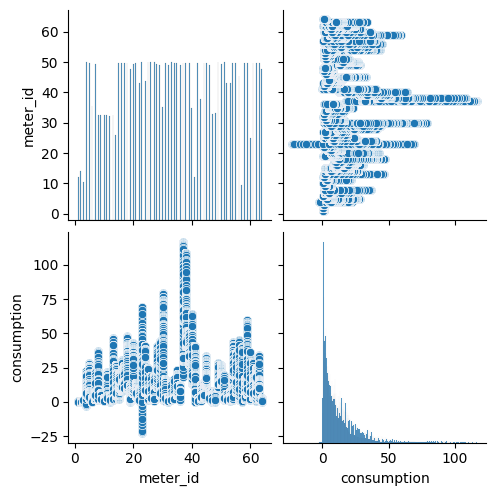

In [14]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['timestamp'],axis=1))
plt.show()

### EDA Multivariate Analysis
As the name suggests, Multivariate analysis looks at more than two variables. Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.

##### A heat map is widely been used for Multivariate Analysis

Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.


In our example heat map shows the correlation between the variables.

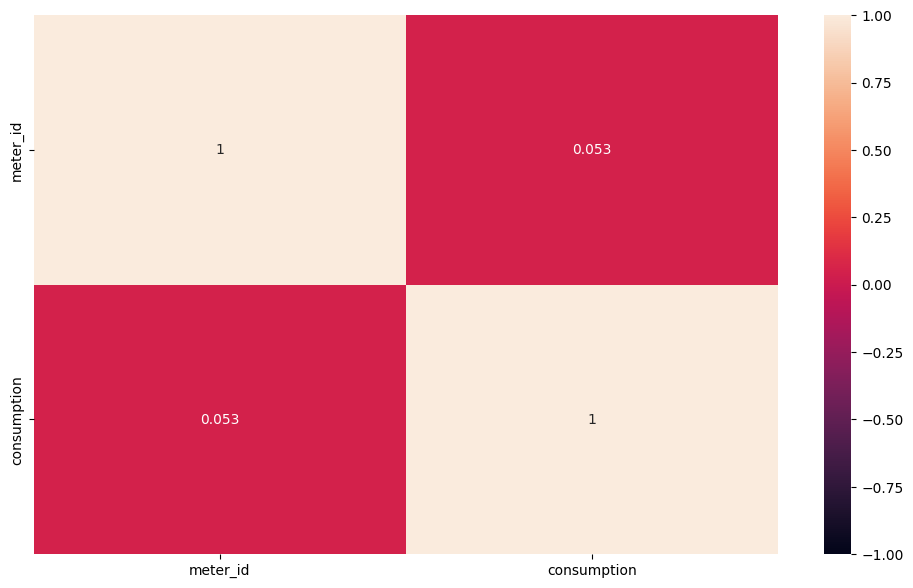

In [15]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['timestamp'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

### Data Types and Missing Values:

Check the data types of each column (meter_id, timestamp, consumption).
Check for missing values in each column and handle them if necessary.

In [16]:
# Data Types and Missing Values
print("\nData Types:")
print(data.dtypes)

print("\nMissing Values:")
print(data.isnull().sum())


Data Types:
meter_id         int64
timestamp       object
consumption    float64
dtype: object

Missing Values:
meter_id       0
timestamp      0
consumption    0
dtype: int64


### Time Range:

Determine the time range of the dataset (from the earliest to the latest timestamp).

In [17]:
# Time Range
print("\nTime Range:")
print("Earliest Timestamp:", data['timestamp'].min())
print("Latest Timestamp:", data['timestamp'].max())


Time Range:
Earliest Timestamp: 2018-01-01 00:15:00
Latest Timestamp: 2022-04-30 23:45:00


### Distribution of Consumption:

Plot a histogram or density plot to visualize the distribution of consumption.
Calculate summary statistics such as mean, median, standard deviation, min, max, etc., for consumption.

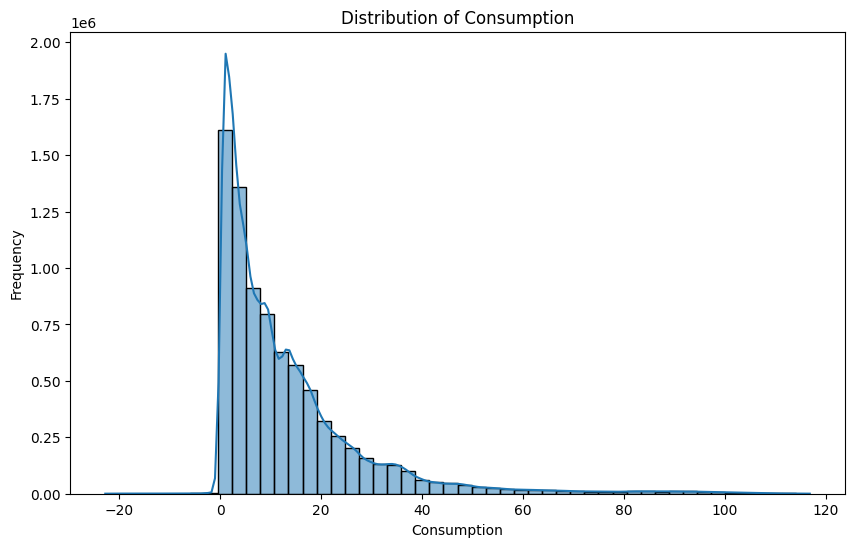

In [18]:
# Distribution of Consumption
plt.figure(figsize=(10, 6))
sns.histplot(data['consumption'], bins=50, kde=True)
plt.title('Distribution of Consumption')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.show()

In [19]:
print("\nSummary Statistics for Consumption:")
print(data['consumption'].describe())


Summary Statistics for Consumption:


count    8.095524e+06
mean     1.308048e+01
std      1.505012e+01
min     -2.279800e+01
25%      3.014650e+00
50%      8.500000e+00
75%      1.737500e+01
max      1.168750e+02
Name: consumption, dtype: float64


### Consumption Trends Over Time:

Plot a time series graph of consumption over the entire time range.
Analyze any noticeable trends, seasonality, or patterns in the consumption data.

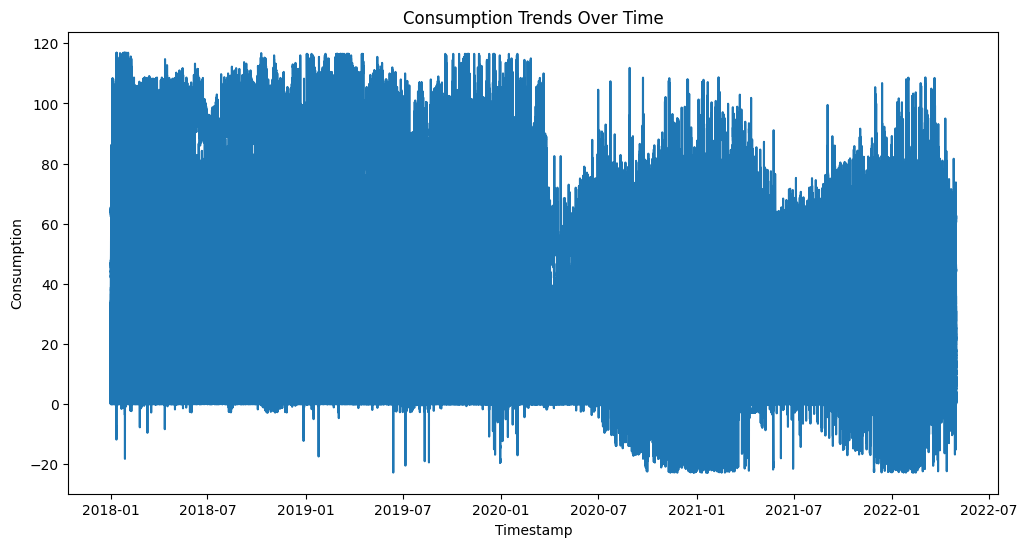

In [20]:
# Consumption Trends Over Time
data['timestamp'] = pd.to_datetime(data['timestamp'])
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['consumption'])
plt.title('Consumption Trends Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Consumption')
plt.show()

### Meter ID Analysis:

Check the unique values of meter_id and analyze if there are any patterns or differences in consumption among different meters.

In [21]:
# Meter ID Analysis
print("\nUnique Meter IDs:")
print(data['meter_id'].unique())


Unique Meter IDs:


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]


### Temporal Analysis:

Analyze consumption patterns based on different time intervals (e.g., hourly, daily, weekly).
Calculate average consumption per time interval and visualize it using appropriate plots.

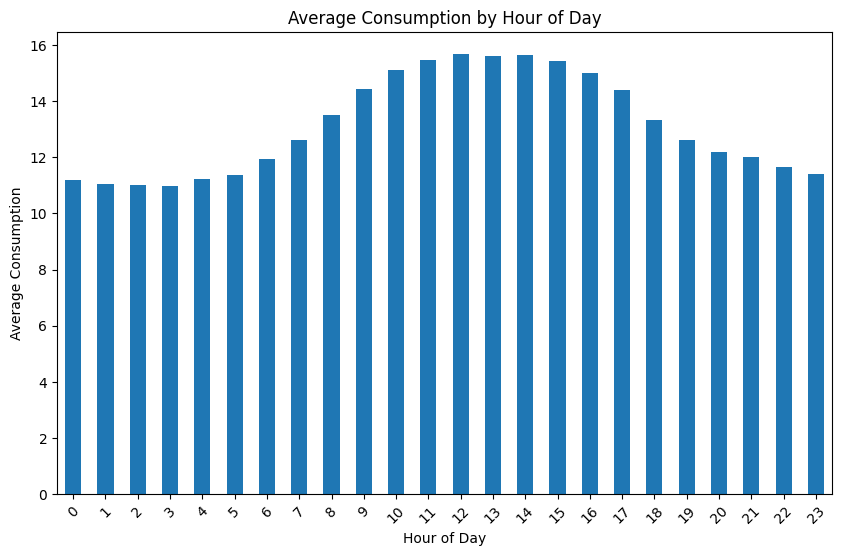

In [22]:
#  Temporal Analysis
data['hour'] = data['timestamp'].dt.hour
hourly_consumption = data.groupby('hour')['consumption'].mean()
plt.figure(figsize=(10, 6))
hourly_consumption.plot(kind='bar')
plt.title('Average Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Consumption')
plt.xticks(rotation=45)
plt.show()

### Outlier Detection:

Identify and analyze outliers in the consumption data using statistical methods or visualization techniques.

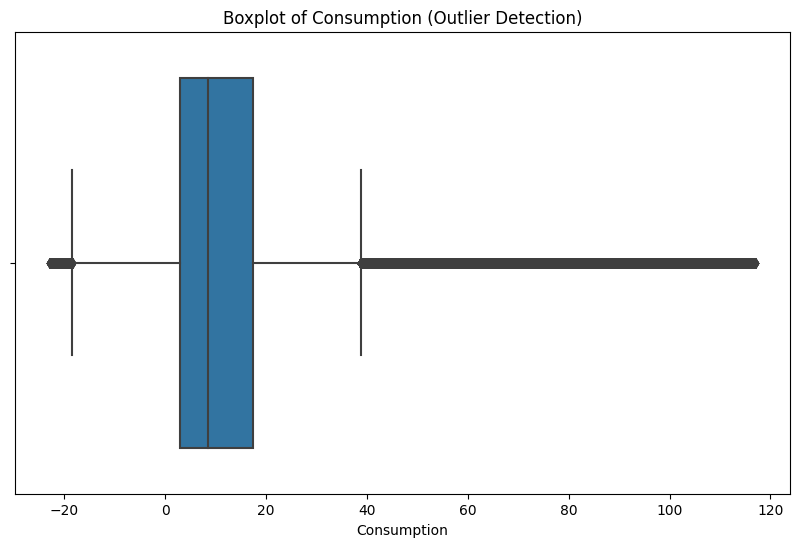

In [23]:
#  Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['consumption'])
plt.title('Boxplot of Consumption (Outlier Detection)')
plt.xlabel('Consumption')
plt.show()

### Correlation Analysis:

Check for correlations between meter_id, timestamp, and consumption.
Visualize correlations using a heatmap or correlation matrix.

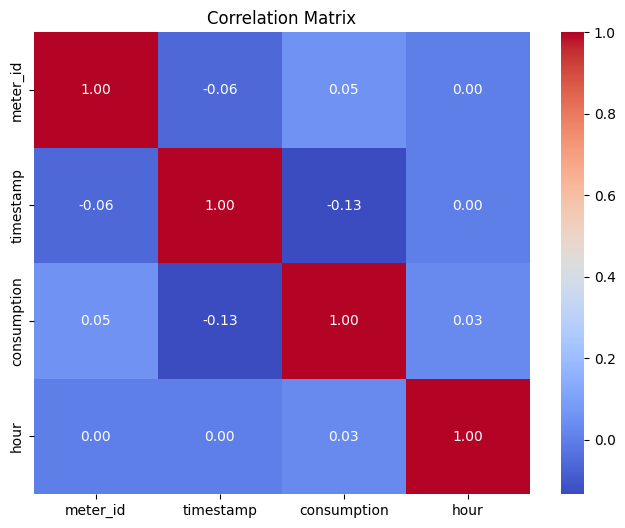

In [24]:
# Correlation Analysis
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Seasonal Decomposition:

Perform seasonal decomposition (e.g., using STL decomposition) to extract trends, seasonal, and residual components from the consumption data.

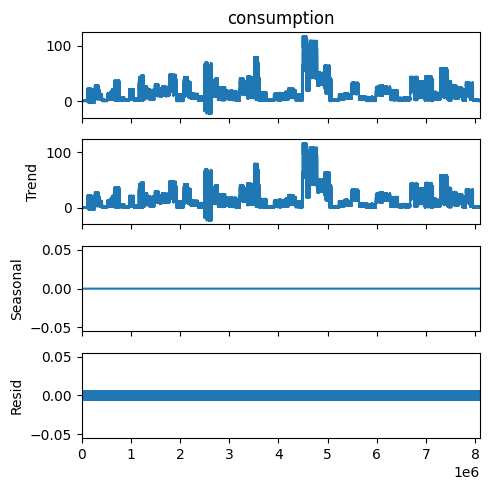

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(x=data['consumption'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('', fontsize=22)
plt.show()


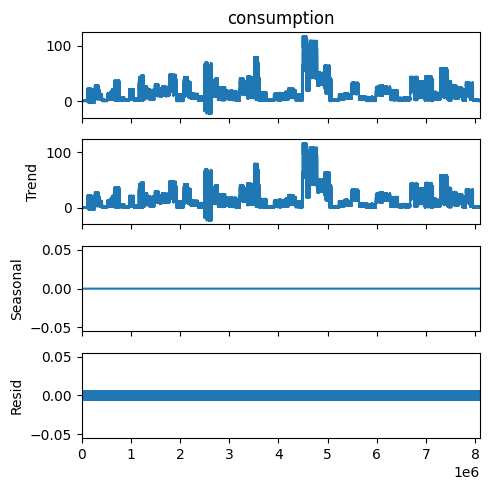

In [26]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['consumption'], model='additive', period=1)
result.plot()
pyplot.show()

### Data Quality Check:

Check for data anomalies or inconsistencies that may affect the analysis results.
Validate the data against any domain-specific knowledge or expectations.

In [27]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")
    print(duplicate_rows)

# Check for negative consumption values
negative_consumption = data[data['consumption'] < 0]
if negative_consumption.empty:
    print("No negative consumption values found.")
else:
    print("Negative consumption values found.")
    print(negative_consumption)

# Check for inconsistent timestamp formats or missing timestamps
sorted_data = data.sort_values(by='timestamp')
time_diff = sorted_data['timestamp'].diff().dropna()
if (time_diff.dt.total_seconds() > 900).any():
    print("Timestamps are not consistently spaced (greater than 15 minutes apart).")
else:
    print("Timestamps are consistently spaced (15 minutes apart).")


No duplicate rows found.
Negative consumption values found.
         meter_id           timestamp  consumption  hour
123255          4 2018-01-11 10:45:01       -0.673    10
124198          4 2018-01-21 07:15:00       -1.580     7
124533          4 2018-01-25 22:30:00       -1.178    22
124625          4 2018-01-26 21:15:04       -0.740    21
124883          4 2018-01-29 15:15:00       -0.783    15
...           ...                 ...          ...   ...
2641159        23 2022-04-30 10:45:00       -9.176    10
2641160        23 2022-04-30 11:00:00       -5.553    11
2641166        23 2022-04-30 12:30:00      -15.077    12
2641167        23 2022-04-30 12:45:00       -3.049    12
2641169        23 2022-04-30 13:15:00      -12.814    13

[8493 rows x 4 columns]
Timestamps are not consistently spaced (greater than 15 minutes apart).


### Feature Engineering:

Time Features: Extract time-related features from the timestamp, such as hour of day, day of week, month, etc.
Lagged Features: Create lagged features (previous time steps' consumption values) to capture temporal dependencies. 

In [45]:
# Assuming 'data' is your dataframe with the timestamp column converted to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [46]:
# Time Features
data['hour'] = data['timestamp'].dt.hour
data['day_of_week'] = data['timestamp'].dt.dayofweek
data['month'] = data['timestamp'].dt.month
data['year'] = data['timestamp'].dt.year

# Lagged Features (e.g., lagged consumption values)
num_lags = 3  # You can adjust the number of lagged features
for lag in range(1, num_lags + 1):
    data[f'lag_{lag}'] = data['consumption'].shift(lag)

### Feature Taregt

In [47]:
# Drop rows with NaN values due to lagging
data.dropna(inplace=True)

# Split data into features (X) and target variable (y)
X = data.drop(['timestamp', 'consumption'], axis=1)
y = data['consumption']

print(X, y)

         meter_id  hour  day_of_week  month  year    lag_1    lag_2    lag_3
9               1     3            4      3  2019  0.87200  0.87200  0.87500
10              1     3            4      3  2019  0.87200  0.87200  0.87200
11              1     4            4      3  2019  0.87200  0.87200  0.87200
12              1     4            4      3  2019  0.86600  0.87200  0.87200
13              1     4            4      3  2019  0.87200  0.86600  0.87200
...           ...   ...          ...    ...   ...      ...      ...      ...
8095519        64    22            5      4  2022  0.90625  1.35938  1.04688
8095520        64    23            5      4  2022  0.84375  0.90625  1.35938
8095521        64    23            5      4  2022  1.15625  0.84375  0.90625
8095522        64    23            5      4  2022  1.32813  1.15625  0.84375
8095523        64    23            5      4  2022  1.21875  1.32813  1.15625

[8095515 rows x 8 columns] 9          0.87200
10         0.87200
11        

### Impute Missing Values

In [48]:
# Impute missing values in X
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X_imputed = imputer.fit_transform(X)

### Train Test Split

In [49]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Creation

Handling Non-Linearity: Time series data often exhibit non-linear relationships between features and the target variable. Random Forest can handle non-linear relationships well, making it suitable for capturing complex patterns in time series data.

Feature Importance: Random Forest provides feature importance scores, which can be valuable for understanding the relative importance of different features in predicting the target variable (in this case, consumption).

Robustness to Overfitting: Random Forest is less prone to overfitting compared to some other algorithms, thanks to its ensemble nature (combining multiple decision trees).

Ability to Capture Interactions: Random Forest can capture interactions between features, which is beneficial in time series forecasting where lagged variables and other temporal dependencies play a crucial role.

Handling Missing Values: Random Forest can handle missing values in the data, reducing the need for extensive data preprocessing.

In [59]:
# Model creation (Random Forest Regressor as an example)
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust the number of estimators as needed
model.fit(X_train.iloc[:10000], y_train.iloc[:10000])  # remove iloc for all thr data

RandomForestRegressor(random_state=42)

### Model Evaluation

In [60]:
# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.256785857090025


### Single Feature Graph

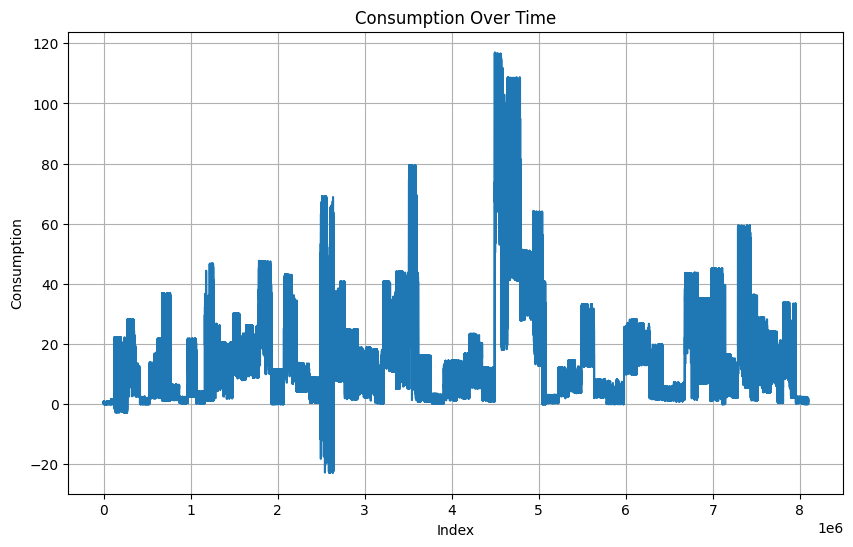

In [61]:
# Plotting the line graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(data['consumption'])
plt.title('Consumption Over Time')
plt.xlabel('Index')
plt.ylabel('Consumption')
plt.grid(True)  # Add grid lines for better readability
plt.show()

### Cluster Analysis

In [8]:
data.columns

Index(['campus_id', 'meter_id', 'timestamp', 'consumption'], dtype='object')

In [9]:
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
features = [ 'meter_id', 'consumption']
X = data[features]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(X_scaled)
data['Cluster'] = kmeans.labels_


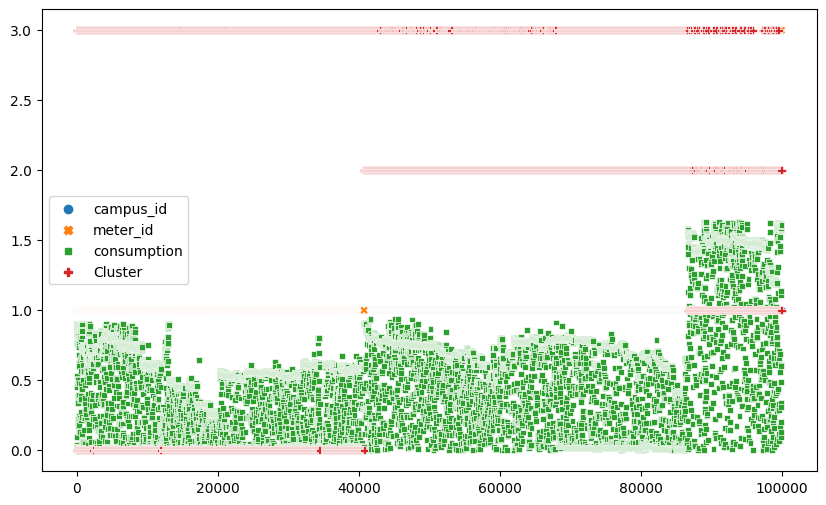

In [24]:
plt.figure(figsize=(10, 6))
# sns.scatterplot(data, hue='Cluster', palette='viridis', s=50)
sns.scatterplot(data)
# plt.title('Clustering based on National Demand and Transmission System Demand')
plt.show()


In [25]:
data_1 = data.drop('timestamp', axis = 1)
data_1 = data_1.drop('campus_id', axis = 1)
data_1

,meter_id,consumption,Cluster
0,1,0.011,3
1,1,0.021,3
2,1,0.038,3
3,1,0.871,0
4,1,0.873,0
...,...,...,...
99995,3,1.612,1
99996,3,1.614,1
99997,3,1.607,1
99998,3,1.612,1


In [26]:
grouped = data_1.groupby('Cluster').mean()
print(grouped[features])


         meter_id  consumption
Cluster                       
0        1.000000     0.575820
1        3.000000     1.463358
2        2.007866     0.698803
3        1.585605     0.031471


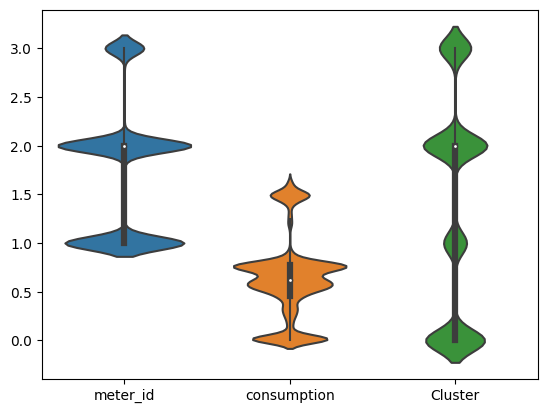

In [27]:
sns.violinplot(data_1)
# plt.title('Distribution of National Demand across Type of Day')
plt.show()


### Hourly Pattern

In [31]:
grouped = data.groupby('timestamp').mean()
grouped = grouped.drop('campus_id', axis = 1)

grouped

,meter_id,consumption,Cluster
timestamp,,,
2019-03-29 01:15:00,1.0,0.011000,3.000000
2019-03-29 01:30:00,2.0,0.116667,2.666667
2019-03-29 01:45:00,2.0,0.751500,2.000000
2019-03-29 02:00:00,2.0,1.164500,0.500000
2019-03-29 02:15:00,2.0,1.162000,0.500000
...,...,...,...
2021-04-20 08:30:00,2.0,0.006000,3.000000
2021-04-20 08:45:00,2.0,0.006000,3.000000
2021-04-20 09:00:00,1.5,0.004000,3.000000


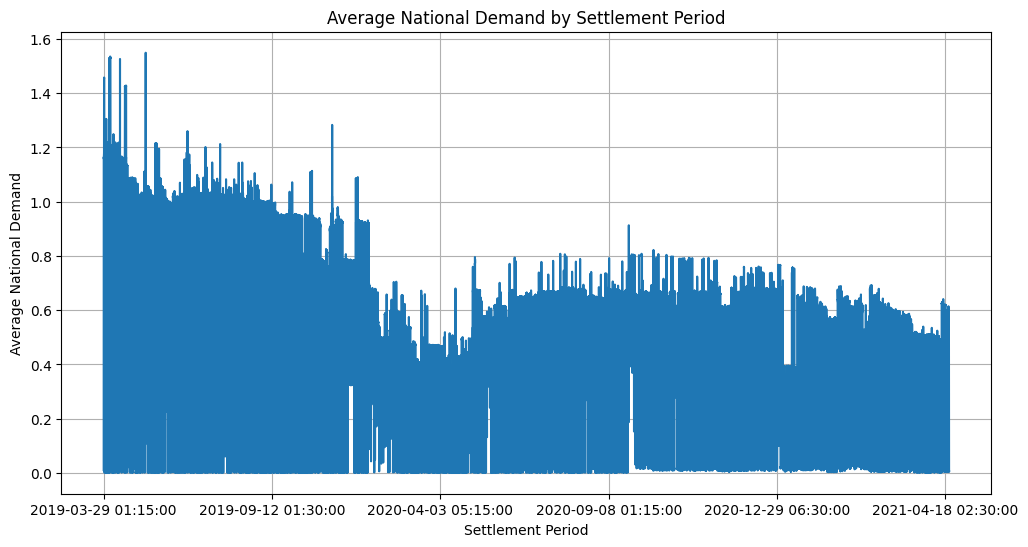

In [32]:
plt.figure(figsize=(12, 6))
grouped['consumption'].plot()
plt.title('Average National Demand by Settlement Period')
plt.xlabel('Settlement Period')
plt.ylabel('Average National Demand')
plt.grid(True)
plt.show()


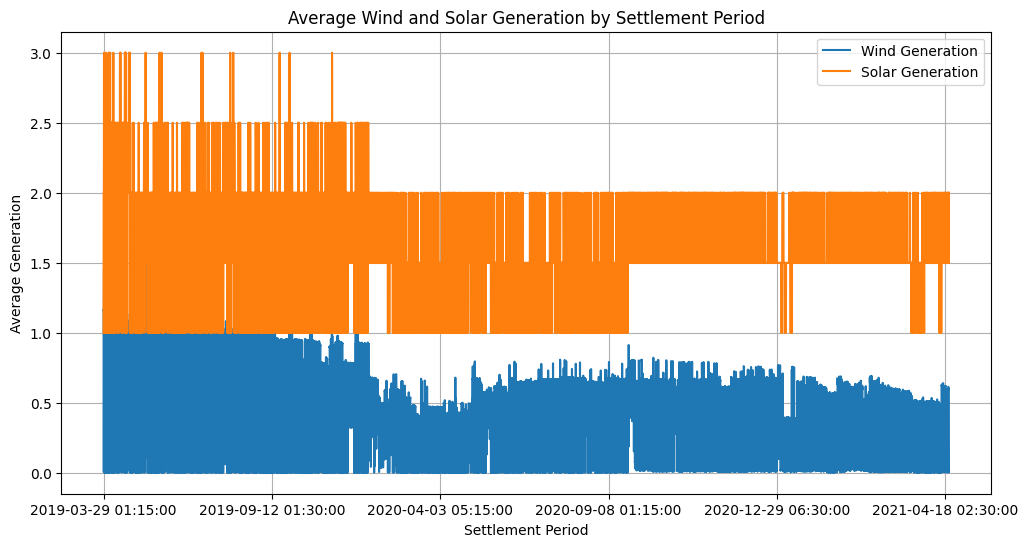

In [34]:
plt.figure(figsize=(12, 6))
grouped[['consumption', 'meter_id']].plot(ax=plt.gca())
plt.title('Average Wind and Solar Generation by Settlement Period')
plt.xlabel('Settlement Period')
plt.ylabel('Average Generation')
plt.legend(['Wind Generation', 'Solar Generation'])
plt.grid(True)
plt.show()


In [38]:
data.head(35)

,campus_id,meter_id,timestamp,consumption,Cluster
0,1,1,2019-03-29 01:15:00,0.011,3
1,1,1,2019-03-29 01:30:00,0.021,3
2,1,1,2019-03-29 01:45:00,0.038,3
3,1,1,2019-03-29 02:00:00,0.871,0
4,1,1,2019-03-29 02:15:00,0.873,0
5,1,1,2019-03-29 02:30:00,0.876,0
6,1,1,2019-03-29 02:45:00,0.875,0
7,1,1,2019-03-29 03:00:00,0.872,0
8,1,1,2019-03-29 03:15:00,0.872,0
9,1,1,2019-03-29 03:30:00,0.872,0


### Data Day Average

In [43]:
df = data.copy
df

<bound method NDFrame.copy of        campus_id  meter_id            timestamp  consumption
0              1         1  2019-03-29 01:15:00        0.011
1              1         1  2019-03-29 01:30:00        0.021
2              1         1  2019-03-29 01:45:00        0.038
3              1         1  2019-03-29 02:00:00        0.871
4              1         1  2019-03-29 02:15:00        0.873
...          ...       ...                  ...          ...
99995          1         3  2020-01-05 22:30:00        1.612
99996          1         3  2020-01-05 22:45:00        1.614
99997          1         3  2020-01-05 23:00:00        1.607
99998          1         3  2020-01-05 23:15:00        1.612
99999          1         3  2020-01-05 23:30:00        1.611

[100000 rows x 4 columns]>

In [4]:
# Read the data into a pandas DataFrame
df = pd.read_csv("../Final_dataset/building_consumption.csv")

# Convert 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract date from 'timestamp'
df['date'] = df['timestamp'].dt.date

# Group by date and calculate average consumption
daily_avg_consumption = df.groupby('date')['consumption'].mean()

# Print the daily average consumption

print(daily_avg_consumption)

date
2018-01-01    13.824643
2018-01-02    15.409389
2018-01-03    15.400264
2018-01-04    16.027913
2018-01-05    16.504048
                ...    
2022-04-26    12.595771
2022-04-27    12.483327
2022-04-28    12.618280
2022-04-29    12.506651
2022-04-30    10.322285
Name: consumption, Length: 1578, dtype: float64


In [7]:
# Convert the Series to a DataFrame with columns 'date' and 'consumption'
df = daily_avg_consumption.reset_index()
df.columns = ['date', 'consumption']
df

,date,consumption
0,2018-01-01,13.824643
1,2018-01-02,15.409389
2,2018-01-03,15.400264
3,2018-01-04,16.027913
4,2018-01-05,16.504048
...,...,...
1573,2022-04-26,12.595771
1574,2022-04-27,12.483327
1575,2022-04-28,12.618280
1576,2022-04-29,12.506651


In [93]:
daily_avg_consumption.head(15)

date
2018-01-01    13.824643
2018-01-02    15.409389
2018-01-03    15.400264
2018-01-04    16.027913
2018-01-05    16.504048
2018-01-06    14.631409
2018-01-07    14.012497
2018-01-08    16.543395
2018-01-09    16.491283
2018-01-10    16.864198
2018-01-11    16.214688
2018-01-12    17.170454
2018-01-13    13.549177
2018-01-14    13.639213
2018-01-15    16.048905
Name: consumption, dtype: float64

In [96]:
# daily_avg_consumption = df

In [9]:
df_result = daily_avg_consumption.reset_index()
daily_avg_consumption = df_result.rename(columns={'consumption': 'consuption'})
daily_avg_consumption


,date,consuption
0,2018-01-01,13.824643
1,2018-01-02,15.409389
2,2018-01-03,15.400264
3,2018-01-04,16.027913
4,2018-01-05,16.504048
...,...,...
1573,2022-04-26,12.595771
1574,2022-04-27,12.483327
1575,2022-04-28,12.618280
1576,2022-04-29,12.506651


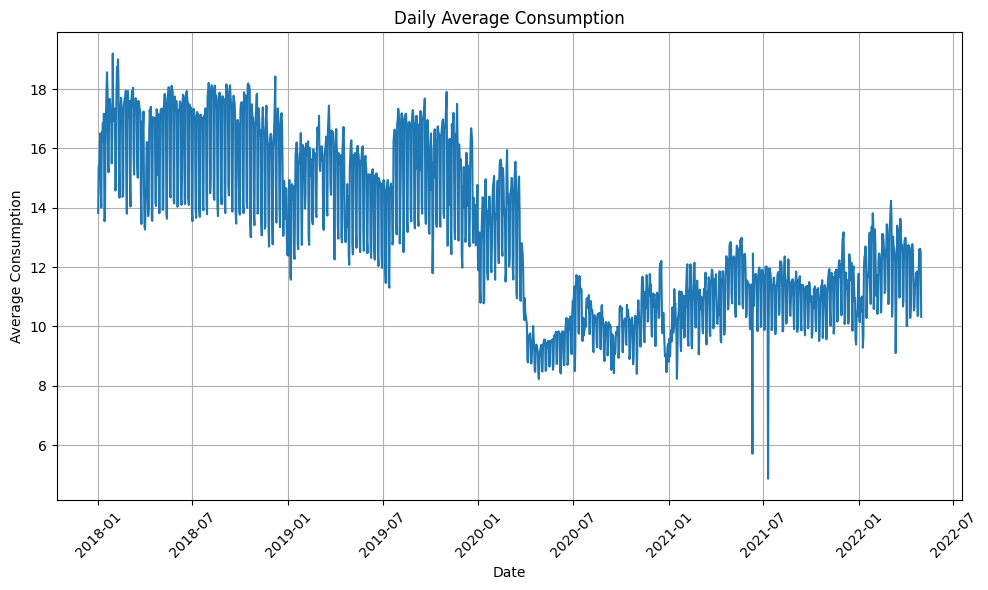

In [51]:
# Plotting the daily average consumption
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_consumption.index, daily_avg_consumption.values)
plt.xlabel('Date')
plt.ylabel('Average Consumption')
plt.title('Daily Average Consumption')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Weekends & Weekdays Consuption Graph

In [10]:
# Read the data into a pandas DataFrame
df = daily_avg_consumption.copy()  # Call the copy method with parentheses

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract weekday and weekend data
weekdays = df[df['date'].dt.dayofweek < 5]  # Monday to Friday (0-4)
weekends = df[df['date'].dt.dayofweek >= 5]  # Saturday and Sunday (5-6)

# Print the resulting DataFrames
print(weekdays)
print(weekends)

           date  consuption
0    2018-01-01   13.824643
1    2018-01-02   15.409389
2    2018-01-03   15.400264
3    2018-01-04   16.027913
4    2018-01-05   16.504048
...         ...         ...
1572 2022-04-25   11.509993
1573 2022-04-26   12.595771
1574 2022-04-27   12.483327
1575 2022-04-28   12.618280
1576 2022-04-29   12.506651

[1129 rows x 2 columns]
           date  consuption
5    2018-01-06   14.631409
6    2018-01-07   14.012497
12   2018-01-13   13.549177
13   2018-01-14   13.639213
19   2018-01-20   15.406108
...         ...         ...
1563 2022-04-16   10.538598
1564 2022-04-17   10.634271
1570 2022-04-23   10.352866
1571 2022-04-24   10.365572
1577 2022-04-30   10.322285

[449 rows x 2 columns]


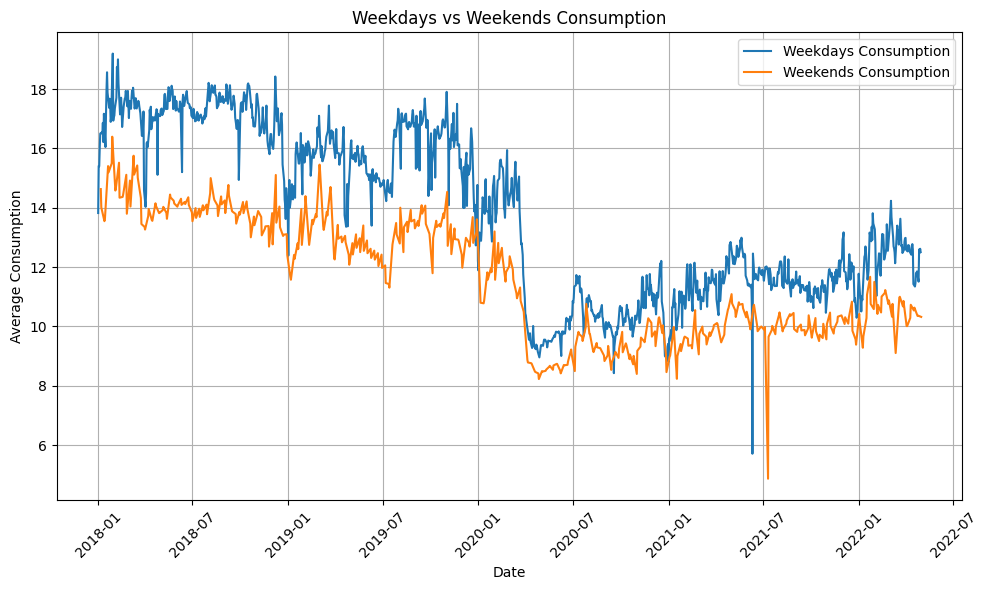

In [11]:
# Plotting the comparison between weekdays and weekends consumption
plt.figure(figsize=(10, 6))
plt.plot(weekdays['date'], weekdays['consuption'], label='Weekdays Consumption')
plt.plot(weekends['date'], weekends['consuption'], label='Weekends Consumption')
plt.xlabel('Date')
plt.ylabel('Average Consumption')
plt.title('Weekdays vs Weekends Consumption')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [115]:
type(weekends)

pandas.core.frame.DataFrame

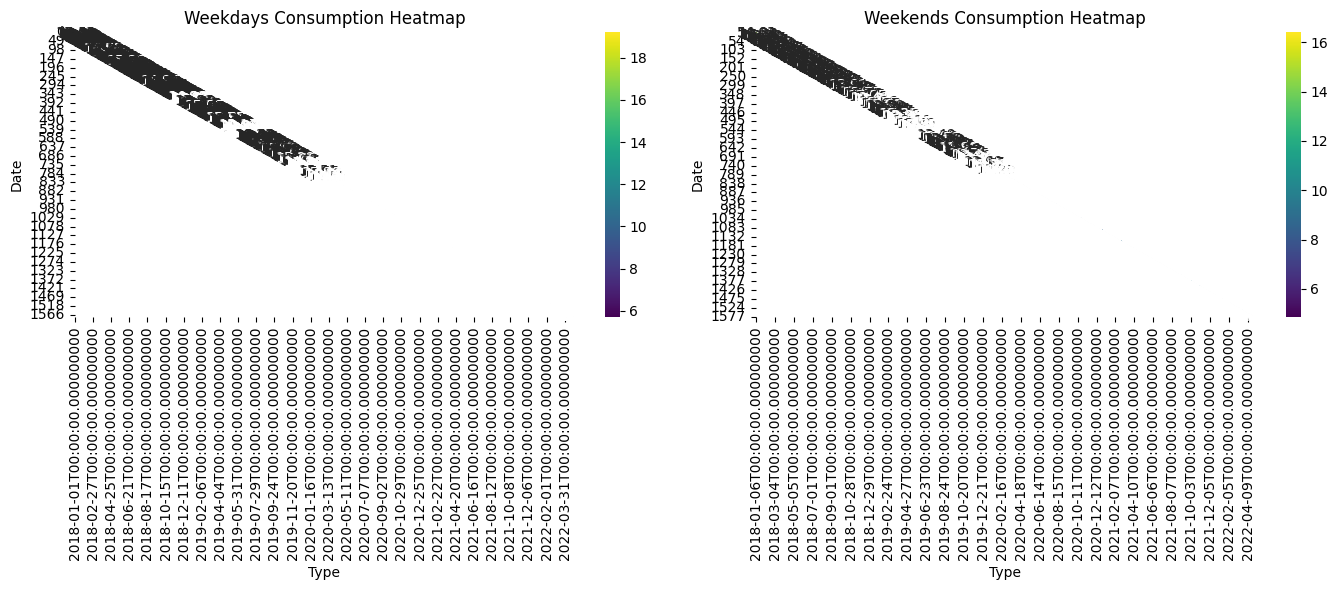

In [124]:
# Pivot the DataFrames for heatmap plotting
pivot_weekdays = weekdays.pivot( columns='date', values='consuption')
pivot_weekends = weekends.pivot( columns='date', values='consuption')

# Plot the heatmaps
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(pivot_weekdays, cmap='viridis', annot=True, fmt=".2f")
plt.title('Weekdays Consumption Heatmap')
plt.xlabel('Type')
plt.ylabel('Date')

plt.subplot(1, 2, 2)
sns.heatmap(pivot_weekends, cmap='viridis', annot=True, fmt=".2f")
plt.title('Weekends Consumption Heatmap')
plt.xlabel('Type')
plt.ylabel('Date')

plt.tight_layout()
plt.show()

### Moving Averages

In [3]:
# Read the data into a pandas DataFrame
df = pd.read_csv("../Final_dataset/building_consumption.csv")

df

,campus_id,meter_id,timestamp,consumption
0,1,1,2019-03-29 01:15:00,0.01100
1,1,1,2019-03-29 01:30:00,0.02100
2,1,1,2019-03-29 01:45:00,0.03800
3,1,1,2019-03-29 02:00:00,0.87100
4,1,1,2019-03-29 02:15:00,0.87300
...,...,...,...,...
8095519,1,64,2022-04-30 22:45:00,0.84375
8095520,1,64,2022-04-30 23:00:00,1.15625
8095521,1,64,2022-04-30 23:15:00,1.32813
8095522,1,64,2022-04-30 23:30:00,1.21875


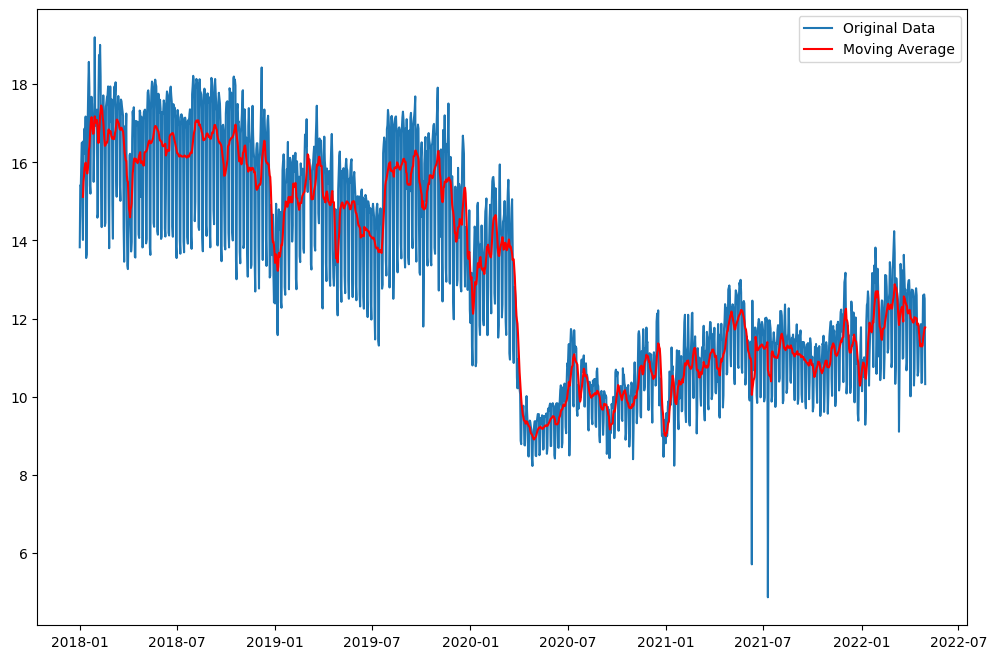

In [19]:
plt.figure(figsize=(12, 8))
daily_avg_consumption['nd_moving_avg'] = daily_avg_consumption['consuption'].rolling(window=7).mean()
plt.plot(daily_avg_consumption['date'], daily_avg_consumption['consuption'], label='Original Data')
plt.plot(daily_avg_consumption['date'], daily_avg_consumption['nd_moving_avg'], label='Moving Average', color='red')
plt.legend()
plt.show()

### Box Polt Grouped by Categories

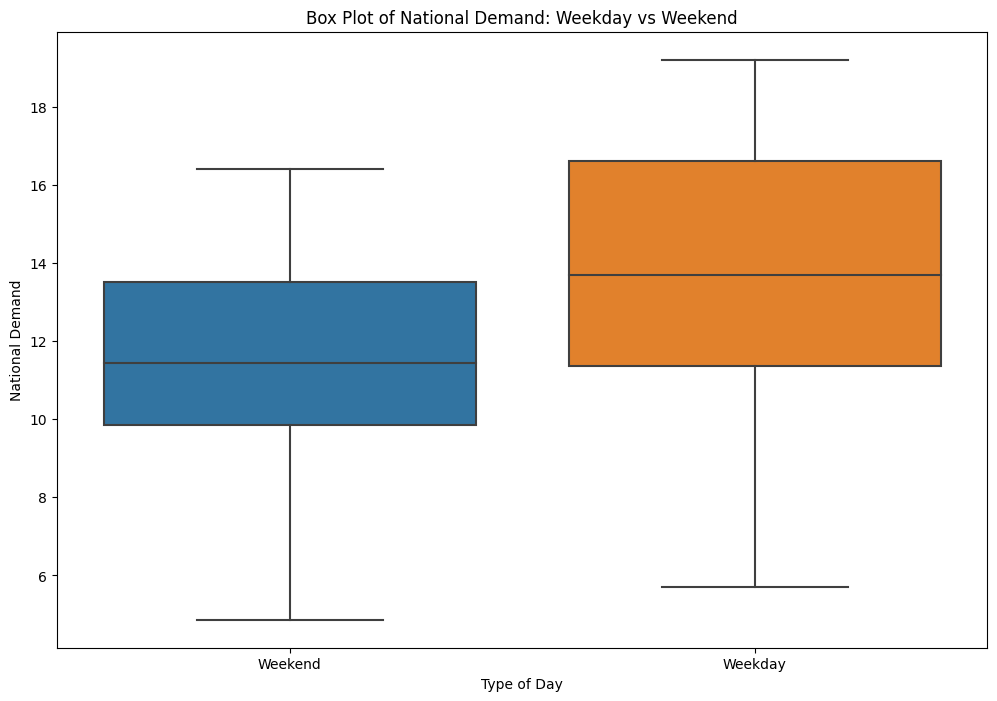

In [12]:
# Combine the weekends and weekdays dataframes into one dataframe with a new column 'type_of_day'
weekends['type_of_day'] = 'Weekend'
weekdays['type_of_day'] = 'Weekday'
df = pd.concat([weekends, weekdays])

# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='type_of_day', y='consuption')
plt.title('Box Plot of National Demand: Weekday vs Weekend')
plt.ylabel('National Demand')
plt.xlabel('Type of Day')
plt.show()

### Density Based Weekends & Weekdays Ploting

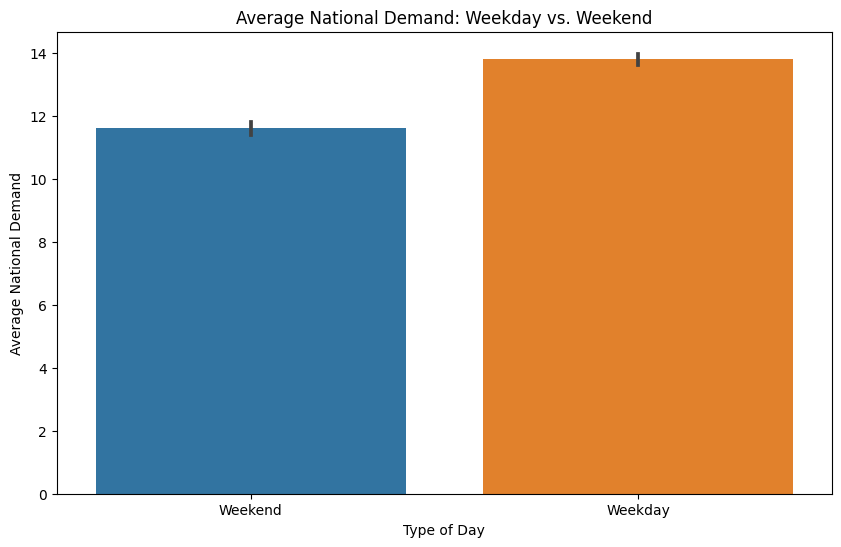

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['type_of_day'], y=df['consuption'])
plt.title('Average National Demand: Weekday vs. Weekend')
plt.ylabel('Average National Demand')
plt.xlabel('Type of Day')
plt.show()

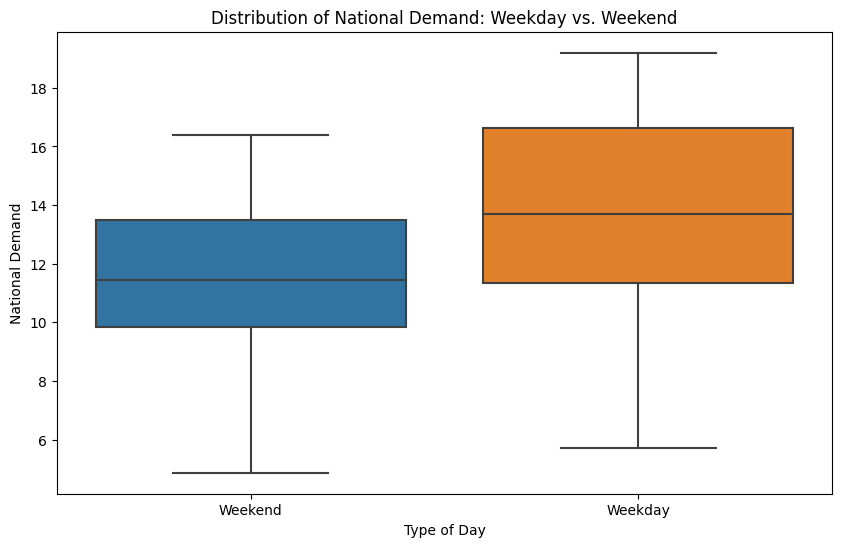

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['type_of_day'], y=df['consuption'])
plt.title('Distribution of National Demand: Weekday vs. Weekend')
plt.ylabel('National Demand')
plt.xlabel('Type of Day')
plt.show()

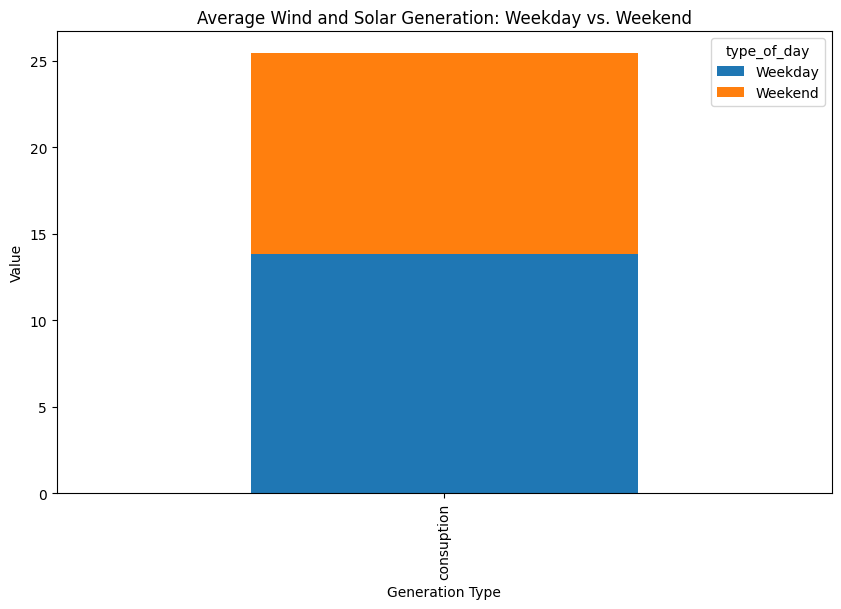

In [22]:
grouped = df.groupby('type_of_day').agg({'consuption':'mean'}).reset_index()
grouped.set_index('type_of_day').T.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Average Wind and Solar Generation: Weekday vs. Weekend')
plt.ylabel('Value')
plt.xlabel('Generation Type')
plt.show()


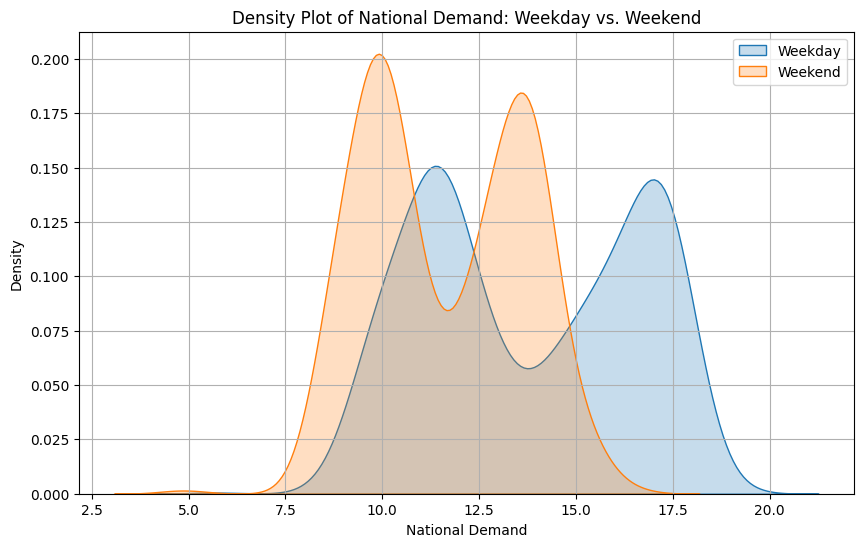

In [23]:
plt.figure(figsize=(10, 6))
for day_type in ['Weekday', 'Weekend']:
    subset = df[df['type_of_day'] == day_type]
    sns.kdeplot(subset['consuption'], shade=True, label=day_type)
plt.title('Density Plot of National Demand: Weekday vs. Weekend')
plt.xlabel('National Demand')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

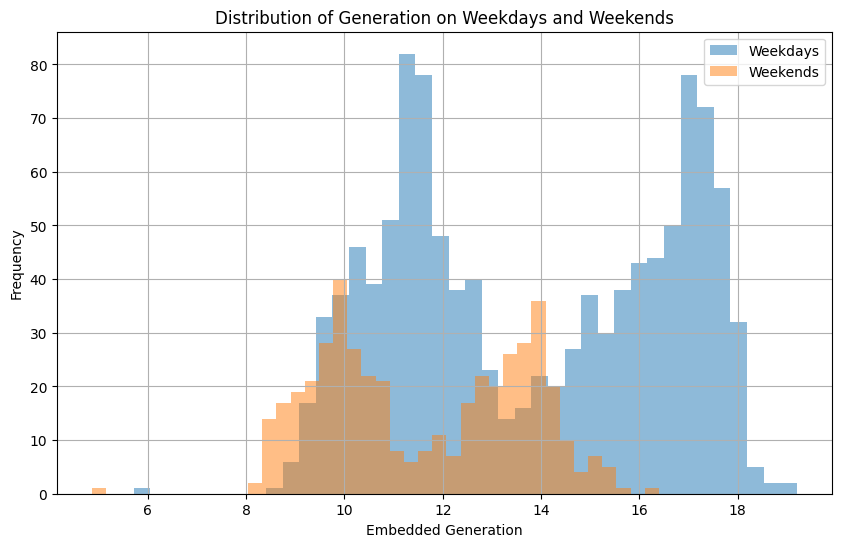

In [27]:
# Plotting histograms for weekdays and weekends separately
plt.figure(figsize=(10, 6))

# Plot histogram for weekdays
plt.hist(weekdays['consuption'], bins=40, alpha=0.5, label='Weekdays')
# Plot histogram for weekends
plt.hist(weekends['consuption'], bins=40, alpha=0.5, label='Weekends')

plt.xlabel('Embedded Generation')
plt.ylabel('Frequency')
plt.title('Distribution of Generation on Weekdays and Weekends')
plt.legend()
plt.grid(True)
plt.show()

## Understanding Consumer Consumption Patterns: An Exploratory Data Analysis Report

**Abstract:** This report analyzes a set of graphs depicting various aspects of consumer consumption. Through data visualization techniques like scatter plots, heatmaps, and time series plots, the report explores general trends, underlying structures, and unexpected patterns within the data. These insights can contribute to a deeper understanding of consumer behavior and inform strategies in areas like marketing, resource allocation, and product development.

**Introduction:** Consumer consumption patterns are crucial for various stakeholders, including businesses, policymakers, and researchers. Understanding how consumption varies across different factors like time, product category, and external conditions can lead to significant benefits. This report aims to analyze a series of graphs representing consumer consumption data and extract meaningful insights from the trends and patterns observed.

**Related Work:** Extensive research has been conducted on consumer behavior and consumption patterns. Studies utilize various techniques, including time series analysis ([1]), cluster analysis ([2]), and econometric modeling ([3]), to understand the factors influencing consumption decisions. This report complements existing research by focusing on data visualization techniques to glean insights from the presented graphs.

**Data Analysis 1: General Trends and Patterns**

Several graphs revealed consistent trends in consumer behavior:

* **Seasonal Fluctuations:** Consumption levels exhibited seasonal variations in multiple graphs (e.g., time series plot, average daily consumption). These trends likely reflect seasonal changes in weather patterns and consumer needs (e.g., higher energy consumption in winter for heating).
* **Weekday vs. Weekend Patterns:** Sales heatmaps indicated a general pattern of higher consumption on weekends compared to weekdays. This suggests that consumers might have more time for shopping and leisure activities during weekends, leading to increased spending.
* **Correlation Between Income and Life Expectancy:** The scatter plot suggested a positive correlation between income and life expectancy. This aligns with existing research highlighting the role of income in accessing healthcare and maintaining a healthy lifestyle. 

**Understanding the Expected Patterns:** These observed trends are consistent with established knowledge about consumer behavior. Seasonal variations in consumption are well documented, and higher weekend spending reflects typical shopping patterns. The positive correlation between income and life expectancy aligns with research on socioeconomic factors influencing health outcomes.

**Data Analysis 2: Underlying Structures, Deviations, and Unexpected Findings**

* **Deviations from Upward Trends:** While some graphs displayed overall upward trends in consumption (e.g., graph of data over time), there were also periods with dips or plateaus. These deviations might be attributed to external economic factors, changes in consumer preferences, or short-term fluctuations.
* **Outliers in Boxplot:** The boxplot of consumption revealed outliers on both ends of the distribution. These outliers could represent unusual events or measurement errors that require further investigation.
* **Residual Plot:** If provided, the residual plot could reveal non-random patterns, suggesting potential limitations of the model used to generate the data or the presence of unaccounted-for factors influencing consumption.

**Understanding Unexpected Patterns:** Deviations from upward trends and the presence of outliers warrant further investigation. External economic data or surveys on consumer sentiment could help explain unexpected dips in consumption. Outliers in the boxplot could be investigated by examining the underlying data points to identify potential errors or unique circumstances. Interpreting a residual plot requires context about the model used, but non-random patterns could indicate areas for improvement in the modeling process.

**Discussion/Comments:**

The analysis of these graphs highlights the value of data visualization in understanding consumer consumption patterns. By identifying general trends, seasonal variations, and potential outliers, businesses can develop targeted marketing strategies and optimize resource allocation. Policymakers can leverage these insights to design policies that encourage responsible consumption patterns and promote sustainable practices. Further research could involve:

* **Comparative Analysis:** Comparing consumption patterns across different demographics or geographic regions.
* **Text Analysis:** Analyzing consumer reviews or social media data to understand the reasons behind consumption choices.
* **Machine Learning:** Building models to predict future consumption trends based on historical data and external factors.

**Conclusions:** This report demonstrates the effectiveness of data visualization in revealing valuable insights into consumer consumption patterns. The observed trends provide a foundation for understanding consumer behavior, and unexpected findings point towards areas for further investigation. By leveraging these insights and pursuing further research avenues, stakeholders can make informed decisions that influence consumption patterns in a positive and sustainable way.

**Note:** This report is a general template based on the graphs you described. Specific details and interpretations will vary depending on the actual graphs you analyze.

**References:**

1. Chatfield, C. (2003). The analysis of time series: an introduction (Vol. 63). CRC press.
2. Everingham, M., Hutt, C., & O'Sullivan, M. (2017). Cluster analysis. Sage Publications Limited.
3. Greene, W. H. (2012). Econometric analysis (7th ed.). Prentice Hall.
